In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Bhargav/Desktop/charts.csv')

In [3]:
df_india_top200_2020 = df[(df['region'].str.contains("India")) & (df['chart'].str.contains("top200")) & (df['date'].str.contains("2020"))]
df_india_top200_2020

,title,rank,date,artist,url,region,chart,trend,streams
9689429,"Muqabla (From ""Street Dancer 3D"")",1,2020-01-01,"Yash Narvekar, Parampara Tandon, Tanishk Bagchi",https://open.spotify.com/track/28veUNu4veN0LOB...,India,top200,SAME_POSITION,157683.0
9689430,"Ghungroo (From ""War"")",2,2020-01-01,"Arijit Singh, Shilpa Rao",https://open.spotify.com/track/0WdbnNKO0Jt4BZA...,India,top200,SAME_POSITION,130313.0
9689431,Yaad Piya Ki Aane Lagi,3,2020-01-01,"Neha Kakkar, Tanishk Bagchi, Lalit Sen",https://open.spotify.com/track/0TkquWzzuxcrwbC...,India,top200,SAME_POSITION,119922.0
9689432,Makhna,4,2020-01-01,"Tanishk Bagchi, Yasser Desai, Asees Kaur",https://open.spotify.com/track/0ZHILXmUaVSLEOC...,India,top200,SAME_POSITION,113551.0
9689433,Falling,5,2020-01-01,Trevor Daniel,https://open.spotify.com/track/4TnjEaWOeW0eKTK...,India,top200,SAME_POSITION,112330.0
...,...,...,...,...,...,...,...,...,...
17287243,"Love Me Like You Do - From ""Fifty Shades Of Grey""",196,2020-12-31,Ellie Goulding,https://open.spotify.com/track/3zHq9ouUJQFQRf3...,India,top200,MOVE_DOWN,42877.0
17287244,Asal Mein,197,2020-12-31,Darshan Raval,https://open.spotify.com/track/0rMeOAvbQZ2RTG4...,India,top200,MOVE_DOWN,42777.0
17287245,Ek Tarfa,198,2020-12-31,Darshan Raval,https://open.spotify.com/track/64r6z0P3RnhpTGd...,India,top200,MOVE_DOWN,42543.0
17287246,Holy (feat. Chance The Rapper),199,2020-12-31,Justin Bieber,https://open.spotify.com/track/5u1n1kITHCxxp8t...,India,top200,MOVE_DOWN,42526.0


In [4]:
songsJan = df_india_top200_2020[(df_india_top200_2020['date'].str.contains("2020-01"))]
janRange = songsJan.date.unique()
print(janRange)

['2020-01-01' '2020-01-02' '2020-01-03' '2020-01-04' '2020-01-05'
 '2020-01-06' '2020-01-07' '2020-01-09' '2020-01-08' '2020-01-10'
 '2020-01-11' '2020-01-12' '2020-01-13' '2020-01-14' '2020-01-15'
 '2020-01-16' '2020-01-17' '2020-01-18' '2020-01-19' '2020-01-20'
 '2020-01-21' '2020-01-23' '2020-01-22' '2020-01-24' '2020-01-25'
 '2020-01-26' '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30'
 '2020-01-31']


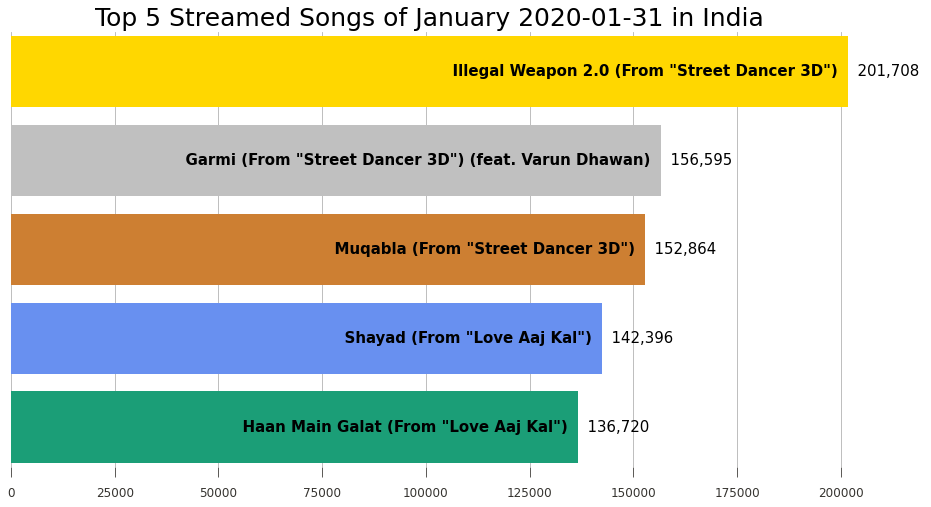

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15,8))

colors = ['#1B9E77','#6890F0','#CD7F32','#C0C0C0','#FFD700']

#Bar Chart Loop
def draw_barchart(current_date):
    top5 = songsJan[songsJan['date'].eq(current_date)].sort_values(by='streams', ascending=True).tail(5)
    ax.clear()
    ax.barh(top5['title'], top5['streams'],color=colors)
    
    for i,(streams, title) in enumerate(zip(top5['streams'],top5['title'])):
        ax.text(streams, i, f'  {title}  ', size=15, weight=600, ha='right', va='center') 
        ax.text(streams, i, f'  {streams:,.0f} ',size=15, weight=300, ha='left',  va='center')

    ax.tick_params(axis='x', colors='#363430', labelsize=12 , length=10, pad=10)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
     #For Title of Chart
    ax.set_title('Top 5 Streamed Songs of January ' + current_date + ' in India' ,fontsize= 25)
    
    #For Current Date
    #ax.text(0.4, 1.05, current_date, transform=ax.transAxes, size=15, ha='left', weight=600)
    
plt.box(False)
plt.title('What was India grooving to in 2020 ?', fontsize=20)   
animator = animation.FuncAnimation(fig, draw_barchart, frames=(janRange))
HTML(animator.to_jshtml())
#animator.save("BarchartTest.gif",dpi=500)
